# 我這邊是改變不同的 Batch_size 

### 會想做這個的原因，是因為我本來調了很多不同的loss或是Activations 都沒啥太大效果 ，後來去改一下就變魔術了！


In [426]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

# 特此感謝 Zanki學長for迴圈的技術支援

In [357]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## 歸一化

In [358]:
x_train_norm=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_norm=(x_test - x_test.min())/(x_test.max()-x_test.min())

In [359]:
x_train= x_train_norm.reshape(60000,28*28)
x_test= x_test_norm.reshape(10000,28*28)

## 把y 變成 一條的形式[.......]

In [361]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## 建構並且組合

In [362]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras import losses

## 改變不同 batchsize 從 20 到 180

In [425]:
folder=[] #創造一個可以讓他存的資料夾 這樣我就只需要用一個機器了 (不然可能會重複訓練)

for i in range (1,10):
    model = Sequential()
    model.add(Dense(5, input_dim = 28*28))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics =['accuracy'])


    n=i*20
    model_i = model.fit(x_train,y_train,batch_size = n,
                            epochs = 20,
                            verbose =1,
                            validation_data = (x_test,y_test))


 
    folder.append(model_i.history["acc"]) # 把它存到我的資料夾
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0796 - acc: 0.2959 - val_loss: 0.0635 - val_acc: 0.4628
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0479 - acc: 0.6504 - val_loss: 0.0350 - val_acc: 0.7594
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0302 - acc: 0.7880 - val_loss: 0.0258 - val_acc: 0.8244
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0240 - acc: 0.8390 - val_loss: 0.0214 - val_acc: 0.8576
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0211 - acc: 0.8603 - val_loss: 0.0192 - val_acc: 0.8729
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0196 - acc: 0.8698 - val_loss: 0.0185 - val_acc: 0.8793
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0186 - acc: 0.8777 - val_loss: 0.0183 - val_acc

60000/60000 [==============================] - 1s 17us/step - loss: 0.0279 - acc: 0.8213 - val_loss: 0.0270 - val_acc: 0.8240
Epoch 18/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0270 - acc: 0.8264 - val_loss: 0.0261 - val_acc: 0.8318
Epoch 19/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0262 - acc: 0.8312 - val_loss: 0.0255 - val_acc: 0.8343
Epoch 20/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0256 - acc: 0.8348 - val_loss: 0.0249 - val_acc: 0.8379
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0886 - acc: 0.1522 - val_loss: 0.0866 - val_acc: 0.1621
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0848 - acc: 0.2081 - val_loss: 0.0836 - val_acc: 0.2195
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0828 - acc: 0.2471 - val_loss: 0.0823 - val_acc: 0.2476

In [427]:
len(folder)  #偷看一下是不是真的是這樣的數據

9

In [428]:
np.array(folder[0])

array([0.29585   , 0.65035   , 0.78796667, 0.839     , 0.86033333,
       0.86981667, 0.87773333, 0.88196666, 0.88738333, 0.89031666,
       0.89213333, 0.89425   , 0.89665   , 0.8981    , 0.89941666,
       0.9002    , 0.90116666, 0.9028    , 0.9028    , 0.90385   ])

In [429]:
a=np.array(folder[0]) #因為 test 是字串 所以我們要把它轉一下

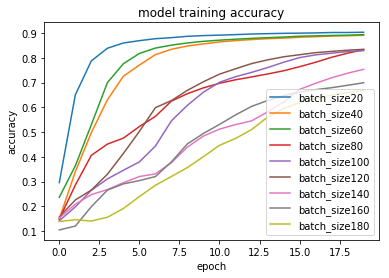

In [430]:
#用for把圖畫出來
i=1
for a in folder: #這邊是把我 資料夾裡面的元素都run過一次
    n=i*20
    plt.plot(a,label=f'batch_size{n}')
        #plt.plot(model_1.history["val_loss"])

    plt.title('model training accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    
    i+=1
  
plt.legend(  loc = "best")
plt.show()

# Conclusion

### 一次丟比較少資料進去的話會比較容易跑到90%，如果size比較大就需要比較多的訓練次數哦！

## 以下是測試的可以不要理他

In [ ]:
model_1 = Sequential()
model_1.add(Dense(5, input_dim = 28*28))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

# 完成
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics =['accuracy'])

In [ ]:
len(model_1.history["acc"])

In [ ]:
model.summary()

In [ ]:
model_1 = model.fit(x_train,y_train,batch_size = 10,
                        epochs = 20,
                        verbose =1,
                        validation_data = (x_test,y_test))

In [ ]:
fig = plt.figure()
for i in range (1,10):
    
    n=i*20
    model_i = model.fit(x_train,y_train,batch_size = n,
                            epochs = 10,
                            verbose =1,
                            validation_data = (x_test,y_test))

    plt.plot(model_i.history["acc"])
    #plt.plot(model_1.history["val_loss"])

    ax=plt.title(' model validation loss')
    ax=plt.ylabel('loss')
    ax=plt.xlabel('epoch')
    ax=plt.legend([f'modle_{i}'],  loc = "best")
    ax=plt.show()